# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime
import openweathermapy.core as owm
# import pytemperature
# not a standard library: pip install pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + api_key +'&units=imperial' + "&q="
pp = pprint.PrettyPrinter(indent=4)

# print(city_data)
# City=city_data('name')
# Cloudiness=city_data('clouds.all')
# Country=city_data('sys.country')
# Date=city_data('dt')
# Humidity=city_data('main.humidity')
# Lat=city_data('coord.lat')
# Lng=city_data('coord.lon')
# Max_Temp=city_data('main.temp_max')
# Wind_Speed=city_data('wind.speed')     
# print(Max_Temp)

In [12]:
pp = pprint.PrettyPrinter(indent=4)

# functionality
# the settings functionality is understood, but to me it decreases readability
# settings = {"units": "imperial", "appid": api_key}
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
    # Build query URL 
    query_url = generic_weather_url + city
#     city_data = owm.get_current(city, **settings)
    # Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        if weather_json['cod'] != 200:
            print(f'City not found. Skipping...')
        else: #include in our dataset
    #         pp.pprint(weather_json)
            humidity = float(weather_json['main']['humidity'])
            if humidity <= 100:  #humidity can not be above 100 percent
                City.append(weather_json['name'])
                Cloudiness.append(weather_json['clouds']['all'])
                Country.append(weather_json['sys']['country'])
                Date.append(weather_json['dt'])
                Humidity.append(weather_json['main']['humidity'])
                Lat.append(weather_json['coord']['lat'])
                Lng.append(weather_json['coord']['lon'])
                Max_Temp.append(weather_json['main']['temp_max'])
                Wind_Speed.append(weather_json['wind']['speed'])
    except:
        print(f'City not found. Skipping...')        

Beginning Data Retrieval
Processing Record 1 of Set 1 | brae
Processing Record 2 of Set 1 | mashhad
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | nanding
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | yingcheng
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ambilobe
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | shihezi
Processing Record 16 of Set 1 | goderich
Processing Record 17 of Set 1 | port-cartier
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | adrar
Processing Record 24 of Set 1 | challakere

City not found. Skipping...
Processing Record 185 of Set 1 | kaitangata
Processing Record 186 of Set 1 | umea
Processing Record 187 of Set 1 | hay river
Processing Record 188 of Set 1 | nefteyugansk
Processing Record 189 of Set 1 | san patricio
Processing Record 190 of Set 1 | guilin
Processing Record 191 of Set 1 | sibu
Processing Record 192 of Set 1 | ouango
Processing Record 193 of Set 1 | concarneau
Processing Record 194 of Set 1 | kenai
Processing Record 195 of Set 1 | mozarlandia
Processing Record 196 of Set 1 | lolua
City not found. Skipping...
Processing Record 197 of Set 1 | lakeway
Processing Record 198 of Set 1 | ancud
Processing Record 199 of Set 1 | broome
Processing Record 200 of Set 1 | ulladulla
Processing Record 201 of Set 1 | mahebourg
Processing Record 202 of Set 1 | berlevag
Processing Record 203 of Set 1 | chicama
Processing Record 204 of Set 1 | terra santa
Processing Record 205 of Set 1 | lebedyn
Processing Record 206 of Set 1 | vaitupu
City not found. Skipping..

Processing Record 368 of Set 1 | east london
Processing Record 369 of Set 1 | san pedro
Processing Record 370 of Set 1 | half moon bay
Processing Record 371 of Set 1 | boende
Processing Record 372 of Set 1 | dhidhdhoo
Processing Record 373 of Set 1 | grootfontein
Processing Record 374 of Set 1 | vestmannaeyjar
Processing Record 375 of Set 1 | navrongo
Processing Record 376 of Set 1 | bugene
Processing Record 377 of Set 1 | constantine
Processing Record 378 of Set 1 | sedelnikovo
City not found. Skipping...
Processing Record 379 of Set 1 | havre-saint-pierre
Processing Record 380 of Set 1 | atlantic city
City not found. Skipping...
Processing Record 381 of Set 1 | kaura namoda
Processing Record 382 of Set 1 | moron
Processing Record 383 of Set 1 | paradwip
City not found. Skipping...
Processing Record 384 of Set 1 | warrnambool
Processing Record 385 of Set 1 | richards bay
Processing Record 386 of Set 1 | meulaboh
Processing Record 387 of Set 1 | balkhash
Processing Record 388 of Set 1 

Processing Record 547 of Set 1 | hasaki
Processing Record 548 of Set 1 | sungaipenuh
Processing Record 549 of Set 1 | constitucion
Processing Record 550 of Set 1 | pisco
Processing Record 551 of Set 1 | libenge
Processing Record 552 of Set 1 | lar gerd
City not found. Skipping...
Processing Record 553 of Set 1 | fort dodge
Processing Record 554 of Set 1 | ginda
Processing Record 555 of Set 1 | pangody
Processing Record 556 of Set 1 | sturgeon falls
Processing Record 557 of Set 1 | chapaevsk
Processing Record 558 of Set 1 | odweyne
City not found. Skipping...
Processing Record 559 of Set 1 | mbandaka
Processing Record 560 of Set 1 | atasu
Processing Record 561 of Set 1 | omsukchan
Processing Record 562 of Set 1 | praya
Processing Record 563 of Set 1 | magadan
Processing Record 564 of Set 1 | murom
Processing Record 565 of Set 1 | mubi
Processing Record 566 of Set 1 | el badari
City not found. Skipping...
Processing Record 567 of Set 1 | san quintin
Processing Record 568 of Set 1 | sept-

In [13]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 9 columns):
City          559 non-null object
Cloudiness    559 non-null int64
Country       559 non-null object
Date          559 non-null int64
Humidity      559 non-null int64
Lat           559 non-null float64
Lng           559 non-null float64
Max Temp      559 non-null float64
Wind Speed    559 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.4+ KB


In [15]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Brae,88,GB,1552753200,75,60.40,-1.35,42.80,3.36
1,Mashhad,0,IR,1552753800,47,36.30,59.61,57.20,4.70
2,Saint-Joseph,75,FR,1552754168,72,43.56,6.97,64.40,8.05
3,Busselton,0,AU,1552754110,46,-33.64,115.35,66.99,23.31
4,Ushuaia,90,AR,1552752000,87,-54.81,-68.31,50.00,5.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [16]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Cloudiness'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save Figure
    fig_title = (f'{plot_title}.png')
    plt.savefig('pyber ride sharing data.png')
    
    # Show plot
    plt.show()

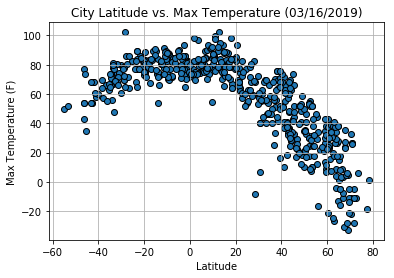

In [17]:
generic_plot('Lat','Max Temp')

#### Latitude vs. Humidity Plot

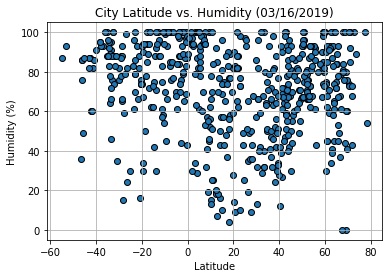

In [18]:
generic_plot('Lat','Humidity')

#### Latitude vs. Cloudiness Plot

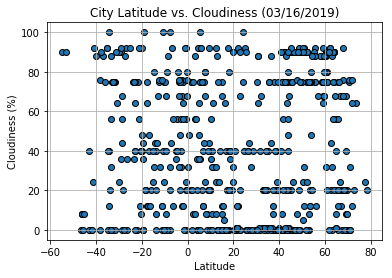

In [19]:
generic_plot('Lat','Cloudiness')

#### Latitude vs. Wind Speed Plot

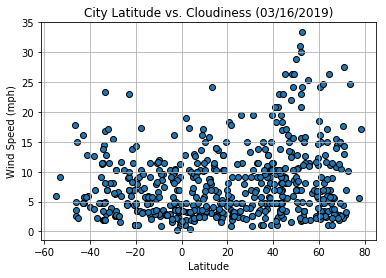

In [20]:
generic_plot('Lat','Wind Speed')